<a href="https://colab.research.google.com/github/vitor-thompson/Python-para-financas-investimento-e-analise-de-dados./blob/main/Fronteira_de_eficiencia_Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obtendo a fronteira eficiente Markowitz

In [20]:
!pip install -q yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
# Este célula garante que as bibliotecas essenciais (numpy, pandas, yfinance, matplotlib) sejam importadas para o ambiente de execução.

In [21]:
# Define os ativos para o portfólio que será otimizado usando a Fronteira Eficiente de Markowitz.
assets = ['ITUB4.SA','ITSA4.SA','TAEE11.SA','SBSP3.SA','VALE3.SA','PETR4.SA', 'RADL3.SA','WEGE3.SA','BBSE3.SA','RAIL3.SA']

# Cria um DataFrame vazio para armazenar os preços de fechamento desses ativos.
pf_data = pd.DataFrame()

# Baixa os preços de fechamento históricos para cada ativo desde 1º de janeiro de 2010.
# Os dados são armazenados no DataFrame 'pf_data'.
for t in assets:
    pf_data[t] = yf.download(t, start='2010-1-1')['Close']

/tmp/ipython-input-966537464.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pf_data[t] = yf.download(t, start='2010-1-1')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-966537464.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pf_data[t] = yf.download(t, start='2010-1-1')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-966537464.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pf_data[t] = yf.download(t, start='2010-1-1')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-966537464.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pf_data[t] = yf.download(t, start='2010-1-1')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-966537464.py:10: Futu

In [22]:
# Exibe as últimas linhas do DataFrame 'pf_data'.
# Isso permite verificar os dados mais recentes dos preços de fechamento dos ativos.
pf_data.tail()

,ITUB4.SA,ITSA4.SA,TAEE11.SA,SBSP3.SA,VALE3.SA,PETR4.SA,RADL3.SA,WEGE3.SA,BBSE3.SA,RAIL3.SA
Date,,,,,,,,,,
2025-12-08,39.217159,11.622583,41.520000,137.190002,65.065605,31.660000,23.309999,47.770000,35.419998,15.80
2025-12-09,39.132027,11.566436,41.330002,136.339996,65.102921,31.860001,23.629999,47.660000,35.250000,15.57
2025-12-10,39.439999,11.610000,41.830002,135.009995,66.297127,31.940001,23.900000,48.470001,35.430000,15.67
2025-12-11,39.410000,11.700000,41.540001,134.509995,67.174126,31.410000,24.670000,48.549999,35.169998,15.74
2025-12-12,39.580002,11.720000,41.750000,136.500000,68.580002,31.570000,24.969999,49.299999,35.580002,15.69


<Axes: xlabel='Date'>

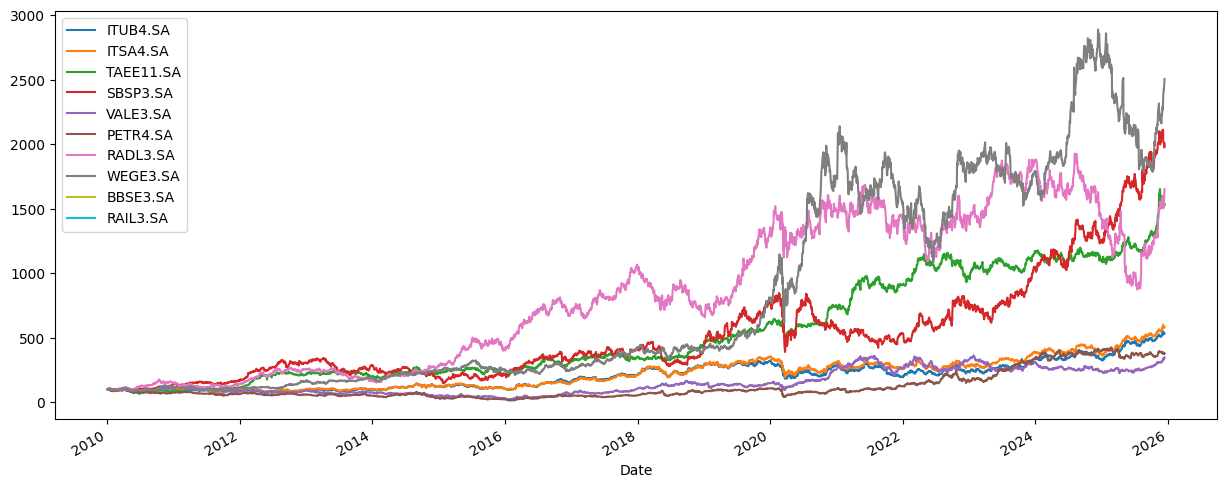

In [23]:
# Normaliza os preços dos ativos do portfólio para uma base 100 e os plota.
# Isso permite comparar a performance relativa de diferentes ativos, começando todos de um ponto de partida comum.
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(15, 6))

In [24]:
# Calcula os retornos logarítmicos diários para cada ativo no portfólio.
# Retornos logarítmicos são frequentemente usados em otimização de portfólios devido às suas propriedades estatísticas.
log_returns = np.log(pf_data / pf_data.shift(1))

In [25]:
# Define o número de dias úteis em um ano para anualização.
dias_uteis = 250
# Calcula o retorno logarítmico anualizado médio para cada ativo.
# Este é o retorno esperado anual para cada ativo no portfólio.
log_returns.mean() * dias_uteis

,0
ITUB4.SA,0.105557
ITSA4.SA,0.111308
TAEE11.SA,0.172227
SBSP3.SA,0.189104
VALE3.SA,0.078595
PETR4.SA,0.083651
RADL3.SA,0.176899
WEGE3.SA,0.203197
BBSE3.SA,0.135017
RAIL3.SA,-0.003780


In [26]:
# Calcula a matriz de covariância anualizada dos retornos logarítmicos dos ativos.
# A covariância mede como os retornos dos ativos se movem em relação uns aos outros.
log_returns.cov() * dias_uteis

,ITUB4.SA,ITSA4.SA,TAEE11.SA,SBSP3.SA,VALE3.SA,PETR4.SA,RADL3.SA,WEGE3.SA,BBSE3.SA,RAIL3.SA
ITUB4.SA,0.089566,0.077799,0.018022,0.045626,0.041056,0.067495,0.029545,0.029418,0.044859,0.054870
ITSA4.SA,0.077799,0.081836,0.018105,0.045899,0.039083,0.064555,0.029722,0.030067,0.043383,0.054631
TAEE11.SA,0.018022,0.018105,0.054014,0.023240,0.012320,0.023286,0.013743,0.012897,0.019551,0.029730
SBSP3.SA,0.045626,0.045899,0.023240,0.119882,0.034626,0.057206,0.027199,0.027670,0.036333,0.054948
VALE3.SA,0.041056,0.039083,0.012320,0.034626,0.150102,0.073685,0.017325,0.026040,0.026088,0.040805
PETR4.SA,0.067495,0.064555,0.023286,0.057206,0.073685,0.189193,0.027920,0.035407,0.050277,0.076007
RADL3.SA,0.029545,0.029722,0.013743,0.027199,0.017325,0.027920,0.105989,0.029052,0.024231,0.036790
WEGE3.SA,0.029418,0.030067,0.012897,0.027670,0.026040,0.035407,0.029052,0.096969,0.027259,0.043125
BBSE3.SA,0.044859,0.043383,0.019551,0.036333,0.026088,0.050277,0.024231,0.027259,0.077295,0.044476
RAIL3.SA,0.054870,0.054631,0.029730,0.054948,0.040805,0.076007,0.036790,0.043125,0.044476,0.209376


In [27]:
# Calcula a matriz de correlação dos retornos logarítmicos dos ativos.
# A correlação é uma medida padronizada da covariância, indicando a força e direção da relação linear entre os retornos.
log_returns.corr()

,ITUB4.SA,ITSA4.SA,TAEE11.SA,SBSP3.SA,VALE3.SA,PETR4.SA,RADL3.SA,WEGE3.SA,BBSE3.SA,RAIL3.SA
ITUB4.SA,1.000000,0.908717,0.259109,0.440315,0.354093,0.518495,0.303242,0.315668,0.531338,0.398194
ITSA4.SA,0.908717,1.000000,0.272309,0.463391,0.352632,0.518801,0.319136,0.337515,0.552341,0.426656
TAEE11.SA,0.259109,0.272309,1.000000,0.288802,0.136826,0.230344,0.181634,0.178200,0.316081,0.298624
SBSP3.SA,0.440315,0.463391,0.288802,1.000000,0.258125,0.379848,0.241290,0.256632,0.364290,0.338526
VALE3.SA,0.354093,0.352632,0.136826,0.258125,1.000000,0.437254,0.137355,0.215842,0.230661,0.213528
PETR4.SA,0.518495,0.518801,0.230344,0.379848,0.437254,1.000000,0.197167,0.261405,0.390844,0.366021
RADL3.SA,0.303242,0.319136,0.181634,0.241290,0.137355,0.197167,1.000000,0.286569,0.276469,0.252361
WEGE3.SA,0.315668,0.337515,0.178200,0.256632,0.215842,0.261405,0.286569,1.000000,0.308910,0.281889
BBSE3.SA,0.531338,0.552341,0.316081,0.364290,0.230661,0.390844,0.276469,0.308910,1.000000,0.348410
RAIL3.SA,0.398194,0.426656,0.298624,0.338526,0.213528,0.366021,0.252361,0.281889,0.348410,1.000000


In [28]:
# Obtém o número de ativos no portfólio.
num_assets = len(assets)

In [29]:
# Gera pesos aleatórios para cada ativo no portfólio.
weights = np.random.random(num_assets)
# Normaliza os pesos para que a soma seja igual a 1 (100%).
weights /= np.sum(weights)
# Exibe os pesos aleatórios gerados.
weights

array([0.18284906, 0.03267976, 0.16098394, 0.1494101 , 0.06944033,
       0.01777526, 0.11595031, 0.06871984, 0.12192695, 0.08026446])

In [30]:
# Verifica se a soma dos pesos é aproximadamente 1.
# Isso garante que a alocação de ativos totaliza 100%.
weights[0] + weights[1]

np.float64(0.21552881433764046)

In [31]:
# Calcula o retorno esperado do portfólio. É a soma ponderada dos retornos médios anuais dos ativos.
np.sum(weights * log_returns.mean()) * dias_uteis

np.float64(0.13649694082990474)

In [32]:
# Calcula a variância esperada do portfólio. É uma medida do risco do portfólio, levando em conta a covariância entre os ativos.
np.dot(weights.T, np.dot(log_returns.cov() * dias_uteis, weights))

np.float64(0.040687824588032724)

In [33]:
# Calcula a volatilidade esperada do portfólio, que é o desvio padrão da variância do portfólio.
# A volatilidade é uma medida comum de risco e é a raiz quadrada da variância.
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * dias_uteis, weights)))

np.float64(0.20171223212297446)

In [34]:
# Inicializa listas para armazenar os retornos e volatilidades dos portfólios simulados, e os pesos dos ativos.
pfolio_returne = []
pfolio_volatility = []
pfolio_weights = []

# Loop para gerar um grande número de portfólios aleatórios.
for x in range(1000):
    # Gera pesos aleatórios para os ativos no portfólio.
    weights = np.random.random(num_assets)
    # Normaliza os pesos para que a soma seja igual a 1.
    weights /= np.sum(weights)
    # Adiciona os pesos à lista.
    pfolio_weights.append(weights)
    # Calcula o retorno anualizado do portfólio e adiciona à lista.
    pfolio_returne.append(np.sum(weights * log_returns.mean()) * dias_uteis)
    # Calcula a volatilidade anualizada do portfólio e adiciona à lista.
    pfolio_volatility.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * dias_uteis, weights))))

# Converte as listas para arrays numpy para facilitar operações futuras.
pfolio_returne = np.array(pfolio_returne)
pfolio_volatility = np.array(pfolio_volatility)
pfolio_weights = np.array(pfolio_weights)

# Exibe os arrays de retorno e volatilidade gerados.
pfolio_returne, pfolio_volatility, pfolio_weights

(array([0.10051855, 0.13687029, 0.1095212 , 0.14274938, 0.12777979,
        0.11779187, 0.12376715, 0.09412661, 0.11901224, 0.1144243 ,
        0.14705823, 0.11876662, 0.12363093, 0.11707736, 0.12485055,
        0.12591773, 0.14183061, 0.13490964, 0.10612792, 0.11462356,
        0.14505594, 0.12734891, 0.11502674, 0.13271461, 0.10736902,
        0.11691278, 0.1133017 , 0.11924555, 0.12280621, 0.11515088,
        0.12318455, 0.13261891, 0.13717126, 0.11481041, 0.13479176,
        0.12690674, 0.10595789, 0.14226319, 0.14550012, 0.11338665,
        0.12186221, 0.09929673, 0.14182642, 0.11055998, 0.12275534,
        0.11357939, 0.12789445, 0.12045188, 0.12666221, 0.14595224,
        0.15350827, 0.13820451, 0.13510337, 0.1389469 , 0.12760445,
        0.1148023 , 0.13663388, 0.11372212, 0.13015688, 0.11375993,
        0.14026427, 0.11365755, 0.12093374, 0.12168549, 0.1062234 ,
        0.11574936, 0.12932249, 0.11445479, 0.11267843, 0.10865669,
        0.14584834, 0.12303288, 0.12402593, 0.13

In [35]:
# Cria um DataFrame pandas para organizar os retornos e volatilidades dos portfólios simulados.
# Este DataFrame será usado para visualizar a fronteira eficiente.
portifolios = pd.DataFrame({'Return': pfolio_returne, 'Volatility': pfolio_volatility, 'Weights': list(pfolio_weights)})

In [36]:
# Exibe as primeiras linhas do DataFrame 'portifolios'.
# Isso permite uma visualização rápida da estrutura dos dados dos portfólios gerados.
portifolios.head()

,Return,Volatility,Weights
0,0.100519,0.243718,"[0.10482784137267938, 0.10218018212877994, 0.0..."
1,0.136870,0.235493,"[0.025968916017240815, 0.14512199452370883, 0...."
2,0.109521,0.231864,"[0.11438970704694562, 0.1014218284147694, 0.07..."
3,0.142749,0.200618,"[0.0866155760630598, 0.0642749443439681, 0.096..."
4,0.127780,0.219924,"[0.016972957411167663, 0.12857404184698526, 0...."


In [39]:
# Exibe as últimas linhas do DataFrame 'portifolios'.
# Isso ajuda a verificar a completude e a faixa dos dados simulados.
portifolios.tail()

,Return,Volatility,Weights
995,0.125918,0.214896,"[0.03642222277187367, 0.10028897419837424, 0.0..."
996,0.133231,0.213923,"[0.10443609005228108, 0.05781452671016849, 0.1..."
997,0.105823,0.235836,"[0.1424586630887546, 0.15637785433006982, 0.09..."
998,0.144166,0.200264,"[0.1555055811619118, 0.11895153693799837, 0.11..."
999,0.116259,0.218442,"[0.07196253804534358, 0.10982634836065247, 0.1..."


Text(0.5, 1.0, 'Fronteira Eficiente de Markowitz - Portfólios Simulados')

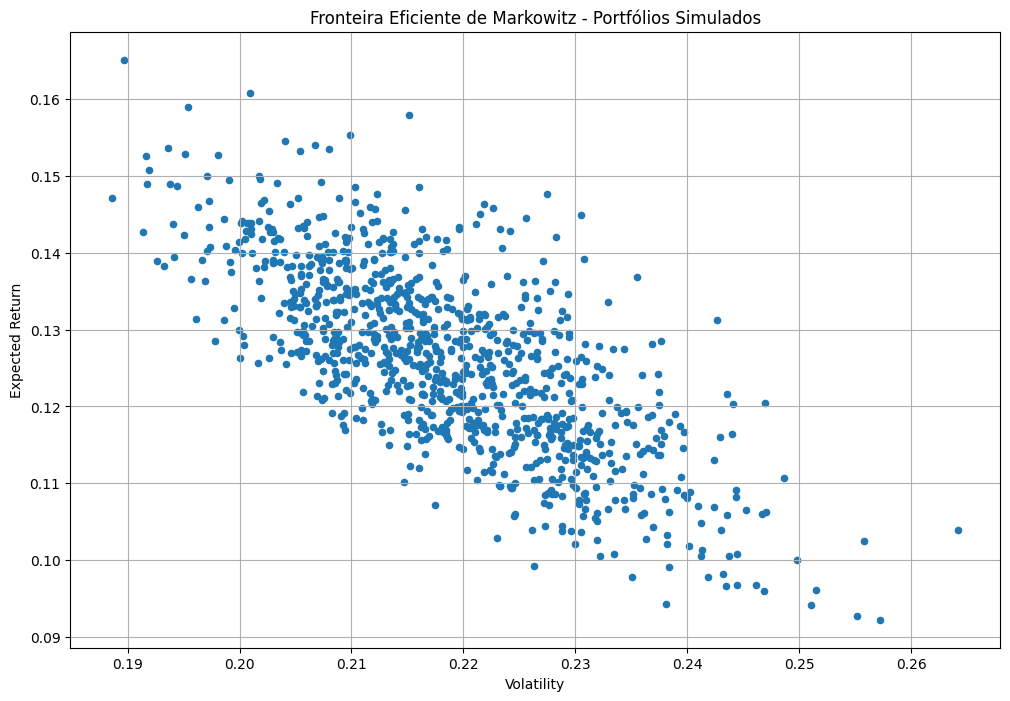

In [40]:
# Plota os portfólios simulados, com a volatilidade no eixo X e o retorno esperado no eixo Y.
# Este gráfico de dispersão é fundamental para visualizar a Fronteira Eficiente de Markowitz.
portifolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(12, 8), grid=True)
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Fronteira Eficiente de Markowitz - Portfólios Simulados')

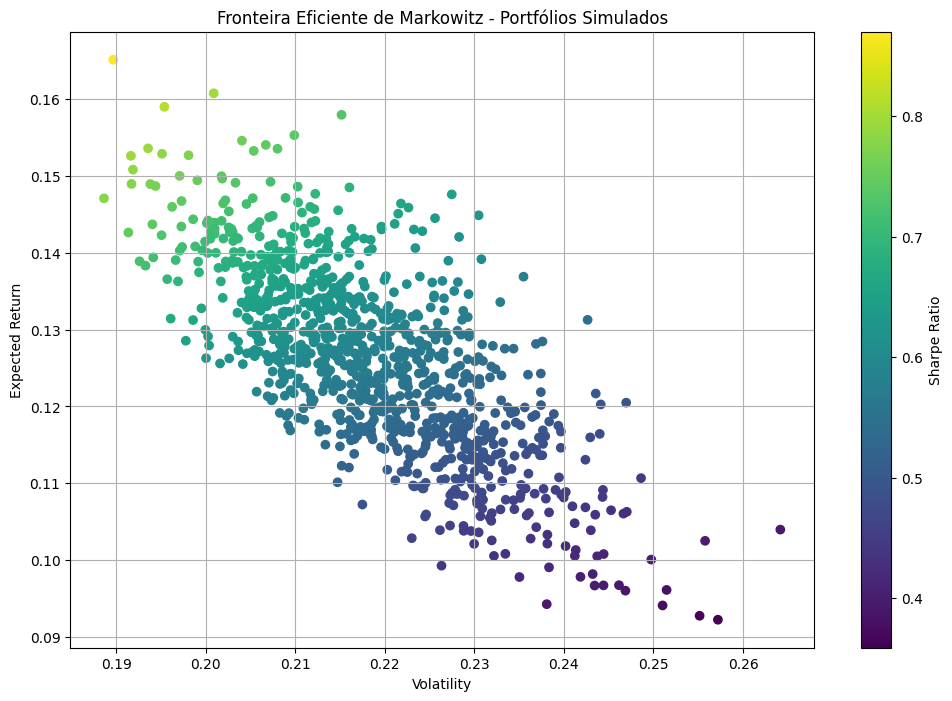

In [41]:
# Plota os portfólios simulados, com a volatilidade no eixo X e o retorno esperado no eixo Y.
# Este gráfico de dispersão é fundamental para visualizar a Fronteira Eficiente de Markowitz.
plt.figure(figsize=(12, 8))
plt.scatter(x=portifolios['Volatility'], y=portifolios['Return'], c=(portifolios['Return'] / portifolios['Volatility']), cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Fronteira Eficiente de Markowitz - Portfólios Simulados')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [42]:
# Encontra o portfólio com o maior Sharpe Ratio.
sharpe_ratio = portifolios['Return'] / portifolios['Volatility']
optimal_portfolio = portifolios.loc[sharpe_ratio.idxmax()]

# Exibe os pesos dos ativos para o portfólio ótimo.
print("Pesos do Portfólio Ótimo (Maior Sharpe Ratio):")
for asset, weight in zip(assets, optimal_portfolio['Weights']):
    print(f"  {asset}: {weight:.4f}")

print(f"\nRetorno Esperado: {optimal_portfolio['Return']:.4f}")
print(f"Volatilidade: {optimal_portfolio['Volatility']:.4f}")

Pesos do Portfólio Ótimo (Maior Sharpe Ratio):
  ITUB4.SA: 0.0063
  ITSA4.SA: 0.0287
  TAEE11.SA: 0.2273
  SBSP3.SA: 0.1149
  VALE3.SA: 0.0817
  PETR4.SA: 0.0000
  RADL3.SA: 0.2377
  WEGE3.SA: 0.2218
  BBSE3.SA: 0.0513
  RAIL3.SA: 0.0303

Retorno Esperado: 0.1651
Volatilidade: 0.1897
